conda install -c anaconda sqlalchemy

conda install -c anaconda pymysql

In [45]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import math

from sklearn import linear_model


In [2]:
import pymysql as pymysql

In [3]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [4]:
df = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\Nicole\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
df. to_csv ( 'BancoUno.csv' , header = False , index = False )

In [6]:
credit=df

In [7]:
credit.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [8]:
import pandas_profiling

C:\Users\Nicole\AppData\Local\Temp\ipykernel_8720\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [9]:
credit.shape

(3670, 24)

In [10]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
credit=credit.drop_duplicates()

In [12]:
credit=credit.rename(columns=credit.iloc[0]).drop(credit.index[0])

In [13]:
credit.columns.values[23]="default_payment_next_month"

In [14]:
credit.head(100)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,90000,male,university,2,35,0,0,0,0,0,...,35565,30942,30835,3621,3597,1179,1112,1104,1143,not default
97,360000,male,graduate school,1,43,-1,-1,-1,-1,-1,...,6451,26370,9956,8339,3394,12902,27000,0,68978,not default
98,150000,male,graduate school,2,27,0,0,0,0,0,...,89775,87725,40788,4031,10006,3266,4040,1698,800,not default
99,50000,female,high school,1,22,0,0,0,0,0,...,13150,8866,7899,1411,1194,379,281,321,197,not default


In [15]:
credit.shape #tamaño del dataframe 

(2396, 24)

In [16]:
credit.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2396 non-null   object
 1   SEX                         2396 non-null   object
 2   EDUCATION                   2396 non-null   object
 3   MARRIAGE                    2396 non-null   object
 4   AGE                         2396 non-null   object
 5   PAY_0                       2396 non-null   object
 6   PAY_2                       2396 non-null   object
 7   PAY_3                       2396 non-null   object
 8   PAY_4                       2396 non-null   object
 9   PAY_5                       2396 non-null   object
 10  PAY_6                       2396 non-null   object
 11  BILL_AMT1                   2396 non-null   object
 12  BILL_AMT2                   2396 non-null   object
 13  BILL_AMT3                   2396 non-null   obje

In [17]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,...,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396
unique,62,2,4,4,52,9,10,10,9,8,...,2008,1983,1947,1146,1129,1040,1034,1038,970,2
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,296,1384,1077,1330,138,1143,1239,1219,1303,1306,...,270,290,343,435,457,515,524,535,618,1877


In [18]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [19]:
credit[["LIMIT_BAL","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]] = credit[["LIMIT_BAL","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].astype("int")

In [20]:
credit.dtypes

LIMIT_BAL                      int32
SEX                           object
EDUCATION                     object
MARRIAGE                       int32
AGE                            int32
PAY_0                          int32
PAY_2                          int32
PAY_3                          int32
PAY_4                          int32
PAY_5                          int32
PAY_6                          int32
BILL_AMT1                      int32
BILL_AMT2                      int32
BILL_AMT3                      int32
BILL_AMT4                      int32
BILL_AMT5                      int32
BILL_AMT6                      int32
PAY_AMT1                       int32
PAY_AMT2                       int32
PAY_AMT3                       int32
PAY_AMT4                       int32
PAY_AMT5                       int32
PAY_AMT6                       int32
default_payment_next_month    object
dtype: object

In [21]:
credit.describe()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,45511.918614,41544.281302,39992.825125,38797.298414,5548.942821,5220.050501,4855.443656,4891.429883,4984.977880,5149.928631
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,69632.762068,68117.135902,64327.134703,65468.199929,13701.948666,14616.927369,22156.285391,14252.068389,16896.223773,20076.659470
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,2296.750000,1856.000000,1524.000000,1012.000000,997.500000,588.000000,247.750000,240.000000,247.750000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,19468.500000,17918.500000,17588.500000,15819.500000,2117.500000,2000.000000,1443.000000,1500.000000,1500.000000,1328.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,56221.750000,49304.000000,48517.750000,47369.500000,5002.250000,4921.750000,4000.000000,4000.000000,4000.000000,4000.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000


In [22]:
gf2=credit.groupby(["MARRIAGE"]).count()
gf2=gf2.iloc[:,:1]
gf2

,LIMIT_BAL
MARRIAGE,
0,6
1,1027
2,1330
3,33


Text(0.5, 1.0, 'AGE')

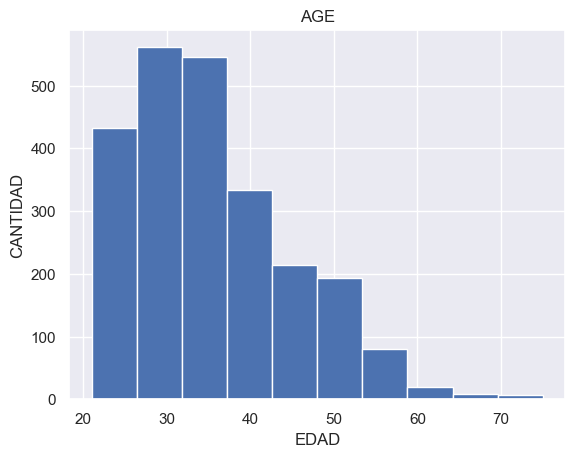

In [23]:
%matplotlib inline
import matplotlib as plt

plt.pyplot.hist(credit["AGE"])



plt.pyplot.xlabel("EDAD")
plt.pyplot.ylabel("CANTIDAD")
plt.pyplot.title("AGE")



Text(0.5, 1.0, 'SEX')

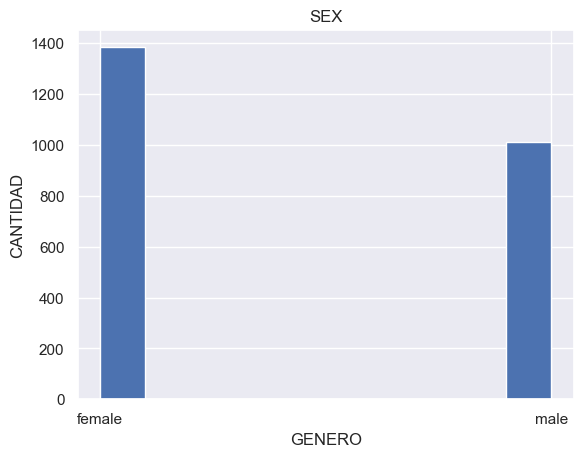

In [24]:
%matplotlib inline
import matplotlib as plt

plt.pyplot.hist(credit["SEX"])



plt.pyplot.xlabel("GENERO")
plt.pyplot.ylabel("CANTIDAD")
plt.pyplot.title("SEX")

Text(0.5, 1.0, 'CREDITO')

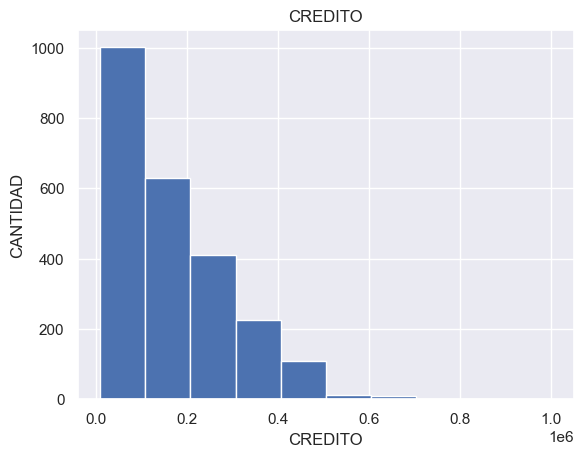

In [25]:
%matplotlib inline
import matplotlib as plt

plt.pyplot.hist(credit["LIMIT_BAL"])



plt.pyplot.xlabel("CREDITO")
plt.pyplot.ylabel("CANTIDAD")
plt.pyplot.title("CREDITO")

In [26]:
credit = pd.get_dummies(credit)
credit.head(5)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default_payment_next_month_default,default_payment_next_month_not default
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
4,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
5,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1


In [27]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   LIMIT_BAL                               2396 non-null   int32
 1   MARRIAGE                                2396 non-null   int32
 2   AGE                                     2396 non-null   int32
 3   PAY_0                                   2396 non-null   int32
 4   PAY_2                                   2396 non-null   int32
 5   PAY_3                                   2396 non-null   int32
 6   PAY_4                                   2396 non-null   int32
 7   PAY_5                                   2396 non-null   int32
 8   PAY_6                                   2396 non-null   int32
 9   BILL_AMT1                               2396 non-null   int32
 10  BILL_AMT2                               2396 non-null   int32
 11  BILL_AMT3        

In [28]:
%matplotlib inline 
import matplotlib.pyplot as ptl

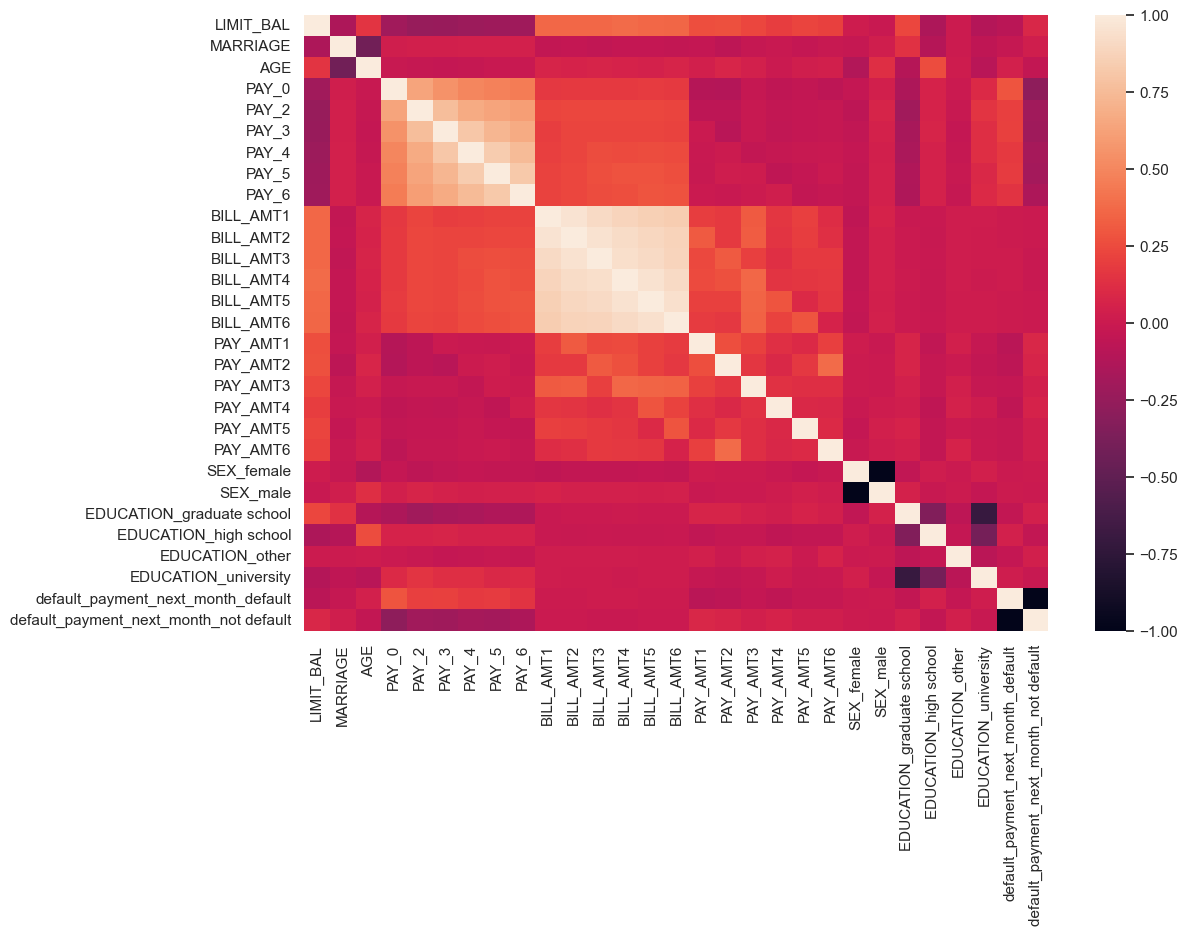

In [29]:
import seaborn as sns
matrix = credit.corr()
ptl.figure(figsize=(12,8))
_= sns.heatmap(matrix)

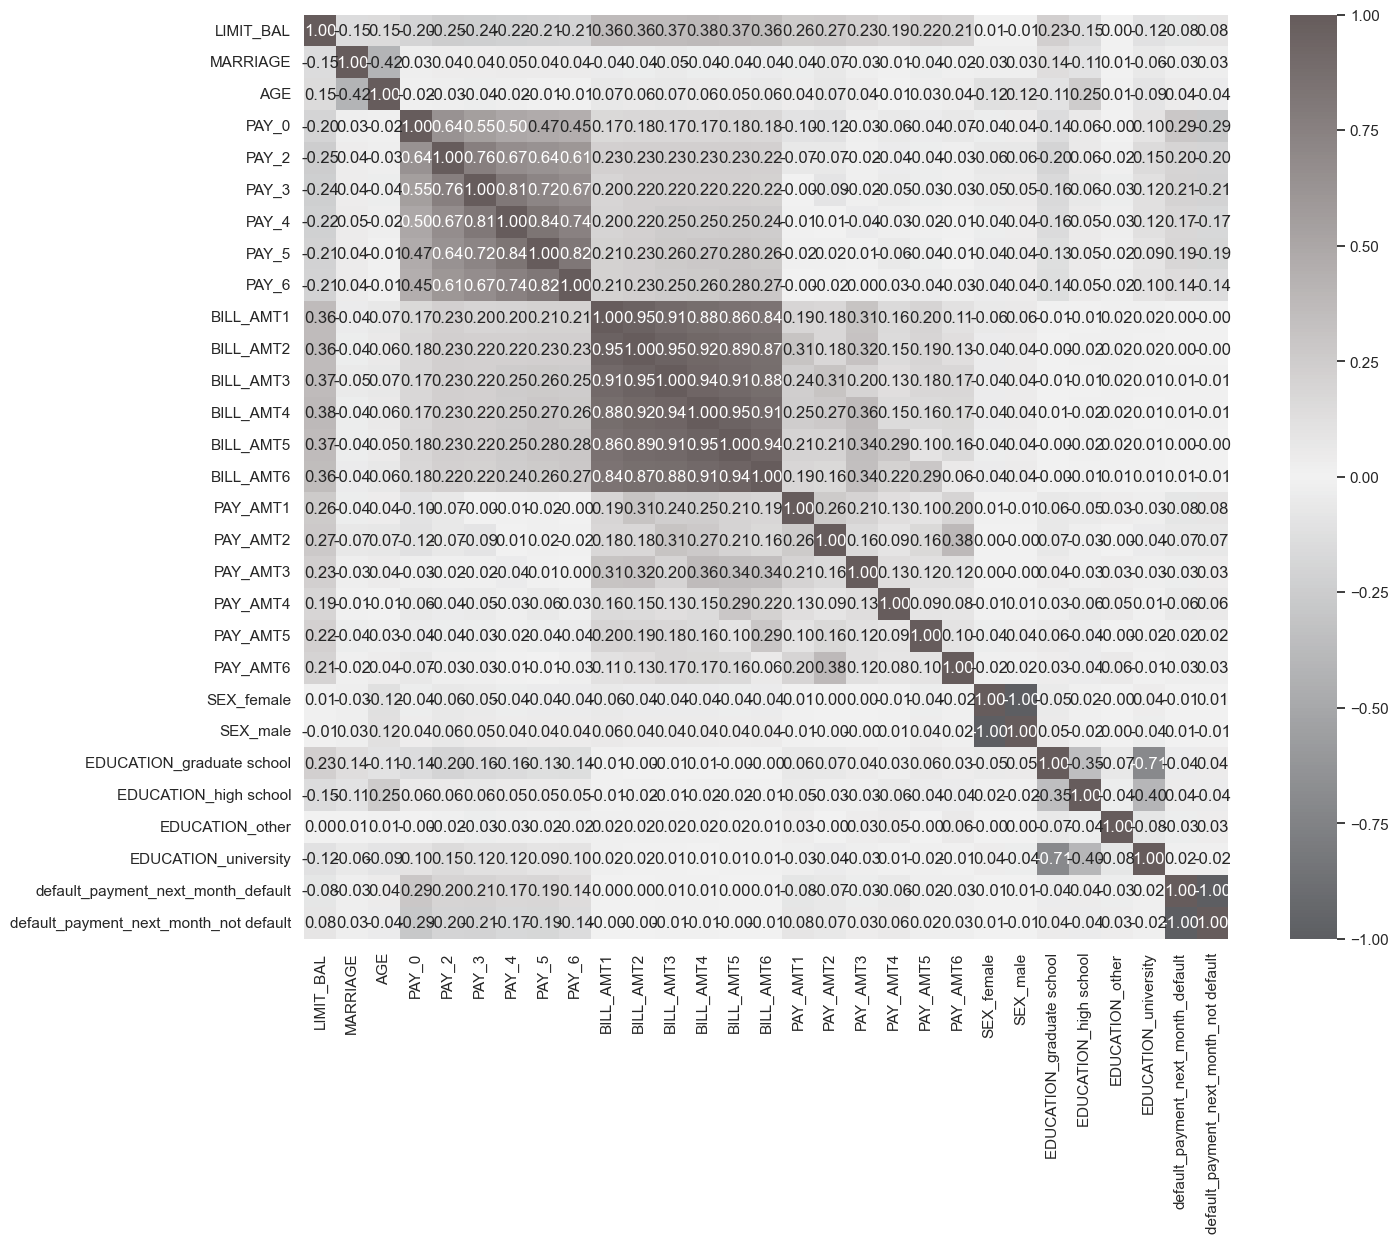

In [30]:
ptl.figure(figsize=(16,12))
cmap= sns.diverging_palette(250,15, s=5, l=40, n=9 , center="light", as_cmap=True)
_=sns.heatmap(matrix,center =0, annot=True,fmt=".2f", square= True , cmap=cmap)

<AxesSubplot:>

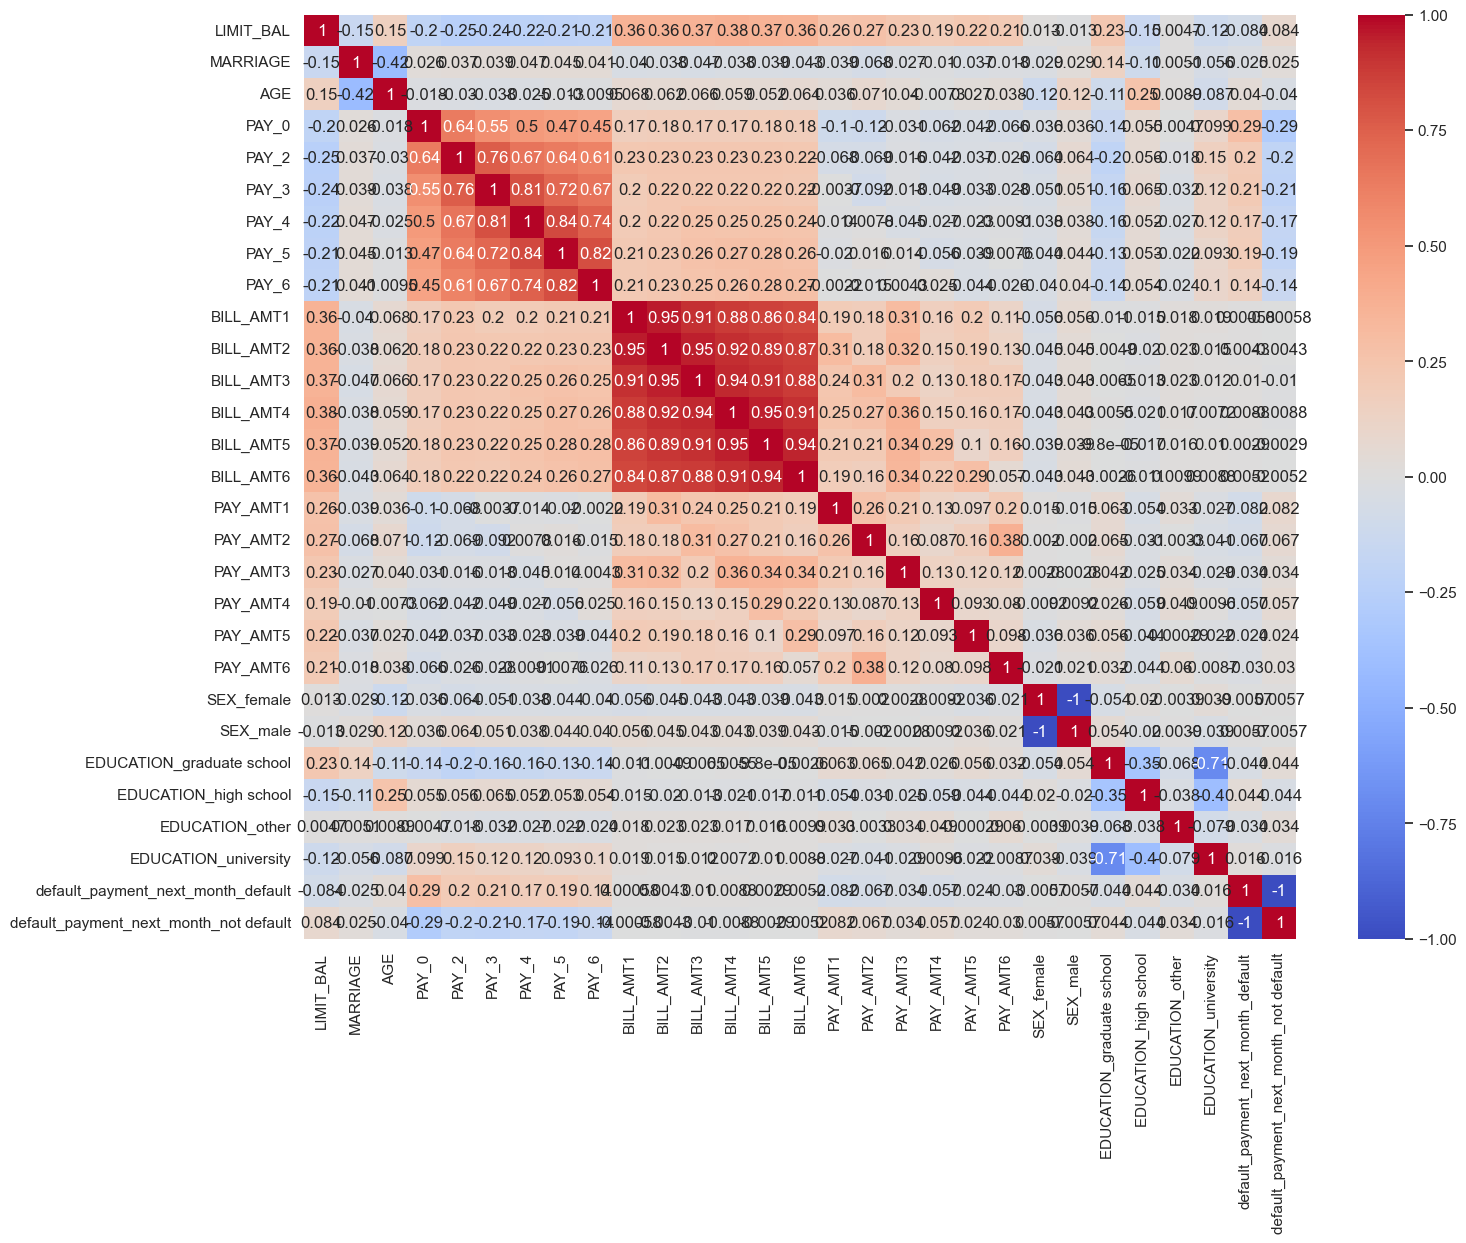

In [54]:
%matplotlib inline 
import matplotlib.pyplot as ptl

correlation_matrix=credit.corr(method="pearson")
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap= "coolwarm")

In [55]:
credit01=credit.drop(["LIMIT_BAL","AGE","PAY_AMT2","PAY_AMT6"],axis=1)

In [56]:
credit01.head()

,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT4,PAY_AMT5,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default_payment_next_month_default,default_payment_next_month_not default
1,1,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,1,0,0,0,0,1,1,0
2,2,-1,2,0,0,0,2,2682,1725,2682,...,1000,0,1,0,0,0,0,1,1,0
3,2,0,0,0,0,0,0,29239,14027,13559,...,1000,1000,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,46990,48233,49291,...,1100,1069,1,0,0,0,0,1,0,1
5,1,-1,0,-1,0,0,0,8617,5670,35835,...,9000,689,0,1,0,0,0,1,0,1


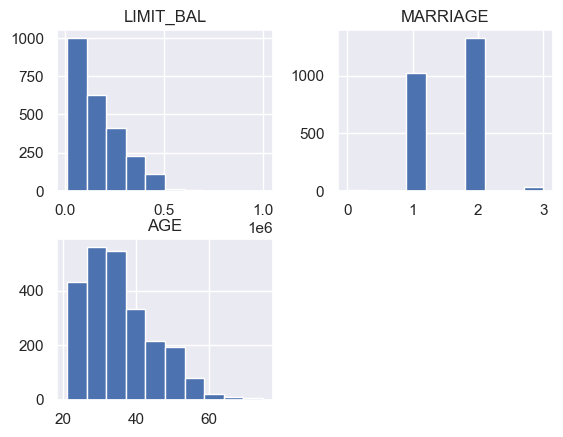

In [57]:
viz = credit[['LIMIT_BAL','MARRIAGE','AGE']]
viz.hist()
plt.show()

In [58]:
corr_matrix=credit01.corr()

In [59]:
default_corr=corr_matrix["default_payment_next_month_default"].drop("default_payment_next_month_default")
pearson_corr=default_corr.abs().sort_values(ascending=False)

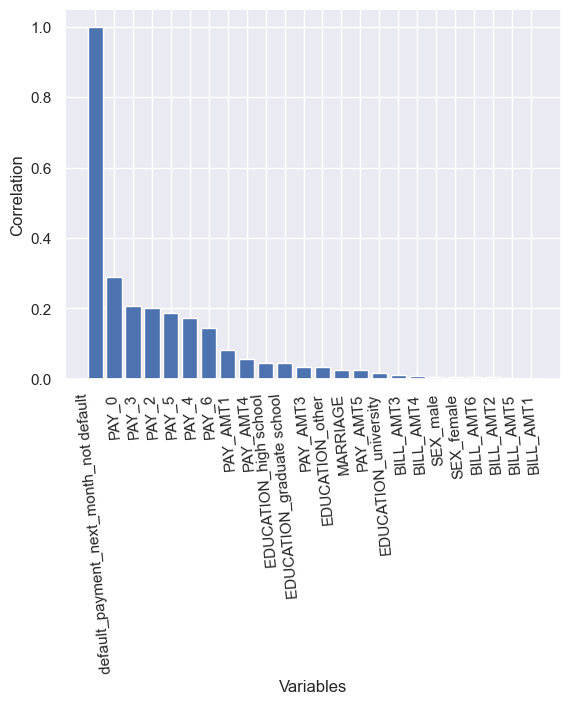

In [60]:
%matplotlib inline 
import matplotlib.pyplot as ptl

plt.bar(range(len(pearson_corr)),pearson_corr.values)
plt.xticks(range(len(pearson_corr)), pearson_corr.index, rotation=95)
plt.ylabel("Correlation")
plt.xlabel("Variables")
plt.show()

AttributeError: 'function' object has no attribute 'array'

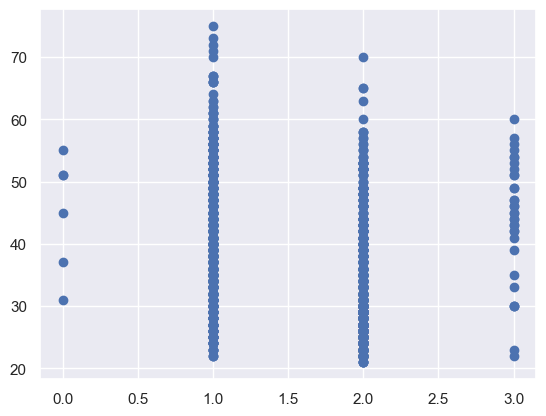

In [62]:
%matplotlib inline 
import matplotlib.pyplot as ptl

plt.scatter(credit["MARRIAGE"], credit["AGE"])
plt.xlabel.array("MARRIAGE")
plt.ylabel.array("AGE")
plt.show()

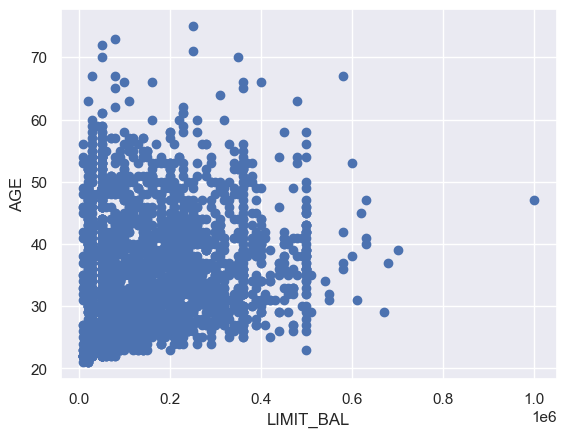

In [48]:
%matplotlib inline 
import matplotlib.pyplot as ptl

plt.scatter(credit["LIMIT_BAL"], credit["AGE"])
plt.xlabel("LIMIT_BAL")
plt.ylabel("AGE")
plt.show()

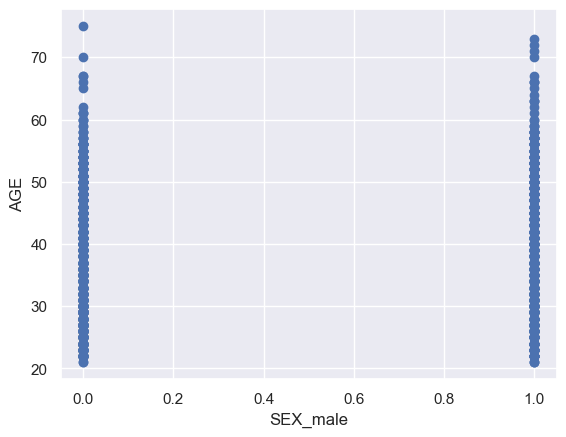

In [65]:
%matplotlib inline 
import matplotlib.pyplot as ptl

plt.scatter(credit["SEX_male"], credit["AGE"])
plt.xlabel("SEX_male")
plt.ylabel("AGE")
plt.show()

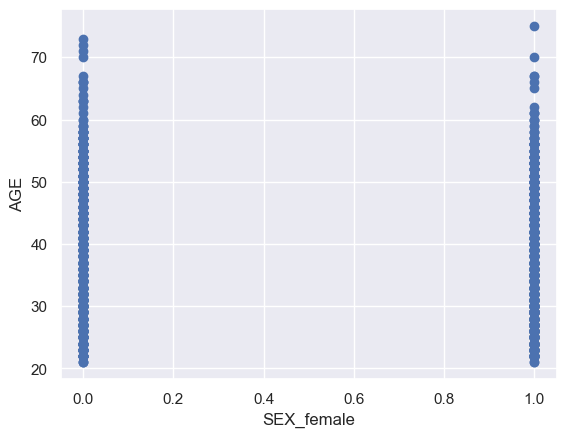

In [66]:
%matplotlib inline 
import matplotlib.pyplot as ptl

plt.scatter(credit["SEX_female"], credit["AGE"])
plt.xlabel("SEX_female")
plt.ylabel("AGE")
plt.show()

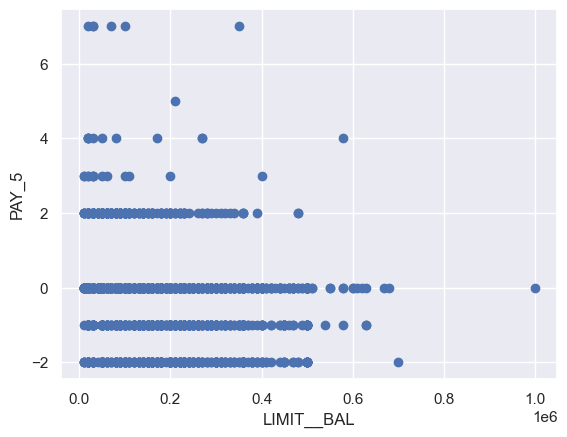

In [68]:
%matplotlib inline 
import matplotlib.pyplot as ptl

plt.scatter(credit["LIMIT_BAL"], credit["PAY_5"])
plt.xlabel("LIMIT__BAL")
plt.ylabel("PAY_5")
plt.show()

In [ ]:
#No es viable utilizar la variable "Y" para implementar un modelo de regresion lineal o multiple.